============================================================
#### Asignatura 5 – Obtención de Datos para el TFM
============================================================

------------------------------------------------------------
##### 1. Carga de librerías
------------------------------------------------------------

In [3]:
# Carga de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

------------------------------------------------------------
##### 2. Carga del dataset
------------------------------------------------------------

In [12]:
# Carga del archivo y lectura

ruta_archivo="C:\\Python\\project1\\virtenv\\CommonPlace_20251219.csv"
common_places = pd.read_csv(
    ruta_archivo,
    low_memory=False
)

# Mostrar todas las columnas sin importar el tamaño de la tabla
pd.set_option('display.max_columns', None)

print("VISUALIZACION")

print("Datos iniciales del dataset:")
print(common_places.info())


VISUALIZACION
Datos iniciales del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20576 entries, 0 to 20575
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   the_geom                  20576 non-null  object 
 1   SEGMENTID                 20574 non-null  object 
 2   COMPLEXID                 7624 non-null   float64
 3   SAFTYPE                   11133 non-null  object 
 4   PLACEID                   20576 non-null  object 
 5   BIN                       14238 non-null  object 
 6   SOURCE                    20576 non-null  object 
 7   OBJECTID                  20576 non-null  float64
 8   SOS INDICATOR             19992 non-null  float64
 9   FACILITY DOMAINS          20576 non-null  int64  
 10  BOROUGH CODE              20365 non-null  float64
 11  SOURCE ID                 5882 non-null   object 
 12  CREATED_BY                983 non-null    object 
 13  CREATED_DATE      

------------------------------------------------------------
##### 3. Limpieza del dataset
------------------------------------------------------------

In [13]:
# Reemplazo de nulos

common_places.fillna(value=0, inplace=True)

# Selección de columnas a utilizar

columns_to_keep = [
    'the_geom',             # Georeferencia
    'BIN',                  # Número edificio
    'FACILITY DOMAINS',     # Categoría de lugar
    'BOROUGH CODE',         # Distrito
    'FACILITY TYPE',        # Tipo de instalación
    'FEATURE NAME',         # Nombre del lugar
]

common_places = common_places[columns_to_keep]

# Cambio de nombre de variables

common_places = common_places.replace({'BOROUGH CODE' : {0: 'Otro', 1: 'Manhattan', 2: 'Bronx',
                                                         3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}})

common_places = common_places.replace({'FACILITY TYPE' : {1: 'Residencial', 2: 'Educativo', 3: 'Cultural',
                                                          4: 'Recreativo', 5: 'Servicios Sociales',
                                                          6: 'Transporte', 7: 'Comercial', 8: 'Gobierno',
                                                          9: 'Religioso', 10: 'Salud', 11: 'Seguridad',
                                                          12: 'Geográfico', 13: 'Misceláneos'}})

# Renombre de columnas

common_places = common_places.rename(columns={
    'the_geom': 'COORDENADAS',
    'BIN': 'EDIFICIO',
    'FACILITY DOMAINS': 'DOMINIO',
    'BOROUGH CODE': 'DISTRITO',
    'FACILITY TYPE': 'CATEGORIA',
    'FEATURE NAME': 'NOMBRE'
})

# Conversión de tipos numéricos

common_places["DOMINIO"] = pd.to_numeric(common_places["DOMINIO"], errors="coerce")

# Conversión a texto (string)

common_places["DISTRITO"] = common_places["DISTRITO"].astype(str).str.replace('.0', '', regex=False)
common_places['NOMBRE'] = common_places['NOMBRE'].astype(str).str.replace('.0', '', regex=False)
common_places["CATEGORIA"] = common_places["CATEGORIA"].astype(str).str.replace('.0', '', regex=False)

# Conversión a coordenadas

common_places["COORDENADAS"] = gpd.GeoSeries.from_wkt(common_places["COORDENADAS"])

# Filtro para Manhattan

clean_common_places = common_places[common_places["DISTRITO"].isin(['Manhattan'])].copy()

# Filtro para lugares

filt_common_places = clean_common_places[clean_common_places["CATEGORIA"].isin(['Residencial', 'Educativo', 'Cultural',
                                                    'Recreativo', 'Comercial', 'Gobierno', 'Salud'])].copy()

# Nuevas columnas filtradas

nuevas_columnas = [
    'NOMBRE',             # Nombre del lugar
    'CATEGORIA',          # Tipo de instalación
    'COORDENADAS'         # Georeferencia
    ]

filt_common_places = filt_common_places[nuevas_columnas]

# Nuevo dataset con geodatos
geo_common_places = gpd.GeoDataFrame(filt_common_places, geometry="COORDENADAS")

print("\nVisualización tras filtrar:")
print(geo_common_places.shape)

geo_common_places.info()

print("\nColumnas disponibles para EDA:")
geo_common_places.describe()


Visualización tras filtrar:
(4089, 3)
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4089 entries, 5 to 20574
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NOMBRE       4089 non-null   object  
 1   CATEGORIA    4089 non-null   object  
 2   COORDENADAS  4089 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 127.8+ KB

Columnas disponibles para EDA:


,NOMBRE,CATEGORIA,COORDENADAS
count,4089,4089,4089
unique,4089,7,4089
top,THOMAS JEFFERSON PARK,Recreativo,POINT (-73.936113484306 40.793070363719)
freq,1,998,1


In [14]:
# Descripción de variables

print("\nDescripción columna NOMBRE:")
print(geo_common_places["NOMBRE"].describe())

print("\nDescripción columna CATEGORIA:")
print(geo_common_places["CATEGORIA"].describe())

print("\nDescripción columna COORDENADAS:")
print(geo_common_places["COORDENADAS"].describe())


Descripción columna NOMBRE:
count                      4089
unique                     4089
top       THOMAS JEFFERSON PARK
freq                          1
Name: NOMBRE, dtype: object

Descripción columna CATEGORIA:
count           4089
unique             7
top       Recreativo
freq             998
Name: CATEGORIA, dtype: object

Descripción columna COORDENADAS:
count                                         4089
unique                                        4089
top       POINT (-73.936113484306 40.793070363719)
freq                                             1
Name: COORDENADAS, dtype: object


In [15]:
# Tipo de categoría que más se repite

print("\nCategoría con más elementos:")
geo_common_places.CATEGORIA.value_counts()


Categoría con más elementos:


CATEGORIA
Recreativo     998
Educativo      970
Residencial    855
Comercial      430
Gobierno       422
Cultural       304
Salud          110
Name: count, dtype: int64

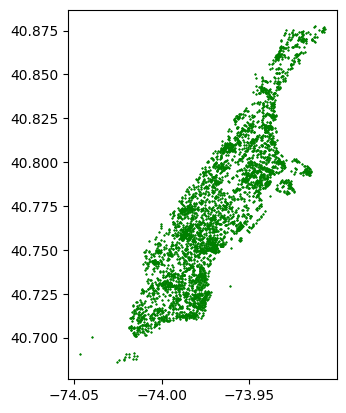

In [16]:
# Generar mapa de puntos con coordenadas

places = geo_common_places.plot(marker='*', color='green', markersize=0.5)

In [17]:
print(geo_common_places.crs)

None


In [18]:
geo_common_places.set_crs("EPSG:2263", inplace=True)

,NOMBRE,CATEGORIA,COORDENADAS
5,THOMAS JEFFERSON PARK,Recreativo,POINT (-73.936 40.793)
6,DALTON SCHOOL THE FIRST PROGRAM,Educativo,POINT (-73.956 40.784)
8,STUYVESANT TOWN 321 AVE C 319 AVE C 315 AVE C,Residencial,POINT (-73.975 40.732)
11,HARLEM GROWN 134 ST GREEN HOUSE,Recreativo,POINT (-73.943 40.814)
15,RIVERSIDE PARK BASKETBALL COURTS W 111 ST,Recreativo,POINT (-73.97 40.806)
...,...,...,...
20543,MARYMOUNT SCHOOL OF NY 97 ST CAMPUS,Educativo,POINT (-73.951 40.787)
20547,EPIPHANY LOWER SCHOOL,Educativo,POINT (-73.982 40.737)
20555,CATHEDRAL HS,Educativo,POINT (-73.951 40.787)
20563,MESIVTHA TIFERETH JERUSALEM SCHOOL,Educativo,POINT (-73.991 40.714)


------------------------------------------------------------
##### 4. Análisis del dataset
------------------------------------------------------------

Primero, se transforman los datos nulos a valores numéricos. Seguidamente, se seleccionan las columnas a utilizar. Posteriormente, se renombran las variables y las columnas. Luego, se filtra el dataset para obtener los datos solo de Manhattan y de los lugares de interés. Finalmente, se convierten los datos y se da formato geográfico.

El dataset final contiene 4089 filas distribuidas en 3 columnas que son NOMBRE, LUGAR y COORDENADAS.

El NOMBRE y las COORDENADAS brindan valores únicos, mientras que LUGAR agrupa 7 categorías (Residencial, Educativo, Cultural, Recreativo, Comercial, Gobierno, Salud).

Estos datos brindan una visualización de puntos de interés de distintas categorías como lo son la recreativa o la educativa. Proporciona las coordenadas geográficas y el nombre del punto para dichas coordenadas.

Los lugares con mayor número de puntos son:

| Categoría   | Cantidad |
| ----------- | -------- |
| Recreativo  | 998      |
| Educativo   | 970      |
| Residencial | 855      |
| Comercial   | 430      |
| Gobierno    | 422      |
| Cultural    | 304      |
| Salud       | 110      |

Agrupando categorías en un mapa se pueden ver las zonas donde podría existir mayor concurrencia de personas de acuerdo al tipo de categoría al cual pertenezcan los lugares.

In [19]:

# Guardado nuevo csv

geo_common_places.to_csv('geo_common_places.csv', index=False)